In [14]:
# Importing the Basic Libraries

import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

In [15]:
# Reading in the Data
mobile_df = pd.read_csv(r"mobile_df.csv")
mobile_df.head()

,Company,model_name,color_group,Stars,Num_Ratings,Num_Reviews,Ram,Storage,Expandable,processor_category,display_inches,Num_camera,battery_mah,Price
0,SAMSUNG,Galaxy F13,Blue,4.4,126250,7344,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Exynos processor,16.76,3,6000,9699
1,POCO,C50,Green,4.4,3204,151,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,Mediatek processor,16.56,1,5000,5749
2,POCO,C50,Blue,4.4,3204,151,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,Mediatek processor,16.56,1,5000,5749
3,REDMI,10,Green,4.3,193536,12428,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Qualcomm processor,17.02,2,6000,9299
4,REDMI,10,Blue,4.3,193536,12428,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Qualcomm processor,17.02,2,6000,9299


In [16]:
# Checking the Datatypes of the columns
mobile_df.dtypes

Company                object
model_name             object
color_group            object
Stars                 float64
Num_Ratings             int64
Num_Reviews             int64
Ram                    object
Storage                object
Expandable             object
processor_category     object
display_inches        float64
Num_camera              int64
battery_mah             int64
Price                   int64
dtype: object

In [17]:
# Statistical description of the Dataset
mobile_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Stars,617.0,4.265478,0.174022,3.0,4.20,4.30,4.40,4.70
Num_Ratings,617.0,36719.580227,71283.367902,9.0,1060.00,5167.00,39024.00,577732.00
Num_Reviews,617.0,2630.980551,4882.498096,1.0,74.00,473.00,3336.00,33897.00
display_inches,617.0,16.630908,0.531809,12.7,16.51,16.71,16.76,17.65
Num_camera,617.0,2.246353,0.998826,0.0,1.00,2.00,3.00,4.00
battery_mah,617.0,4992.724473,487.687056,3000.0,5000.00,5000.00,5000.00,7000.00
Price,617.0,16532.406807,12034.372387,4699.0,9499.00,13895.00,17999.00,94999.00


In [18]:
# Checknig fir the null values
mobile_df.isnull().sum()

Company               0
model_name            0
color_group           0
Stars                 0
Num_Ratings           0
Num_Reviews           0
Ram                   0
Storage               0
Expandable            0
processor_category    0
display_inches        0
Num_camera            0
battery_mah           0
Price                 0
dtype: int64

**Exploratory Data Analysis**

In [19]:
# Replacing the repeated typo errors
mobile_df.Company.replace({"realme":"Realme","Redmi":"REDMI","Motorola":"MOTOROLA","oppo":"OPPO"},inplace=True)

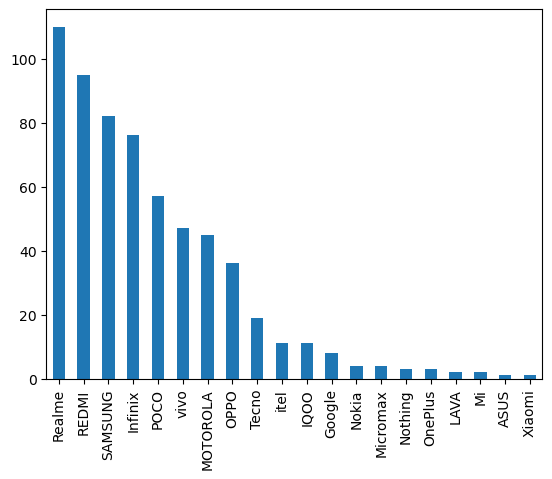

In [20]:
# Barplot of the company variable

mobile_df.Company.value_counts().plot(kind="bar");

From this barplot we see that there are 16 companies with `Realme` having the most number of smartphone models and `Xiaomi` having least number of Smartphone phones.

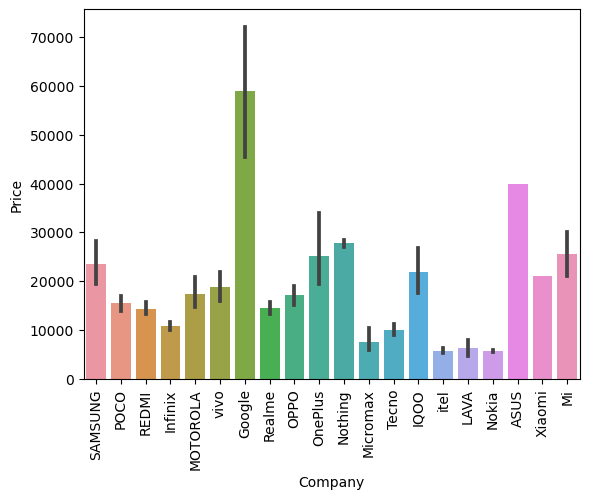

In [21]:
# Since price is the target variable lets take a look at the distribution of Price for each of the companies

sns.barplot(x="Company",y="Price",data=mobile_df)
plt.xticks(rotation='vertical')
plt.show();

From this barplot we come to know that `Google` company's martphones are the most expensive with prices in the range of `45,000 Rs. - 75,000 Rs.`  
Companies like Samsung, Poco, Redmi, Infinix, Motoerola roll out budget phones in the range of `20,000 Rs. - 30,000 Rs.`

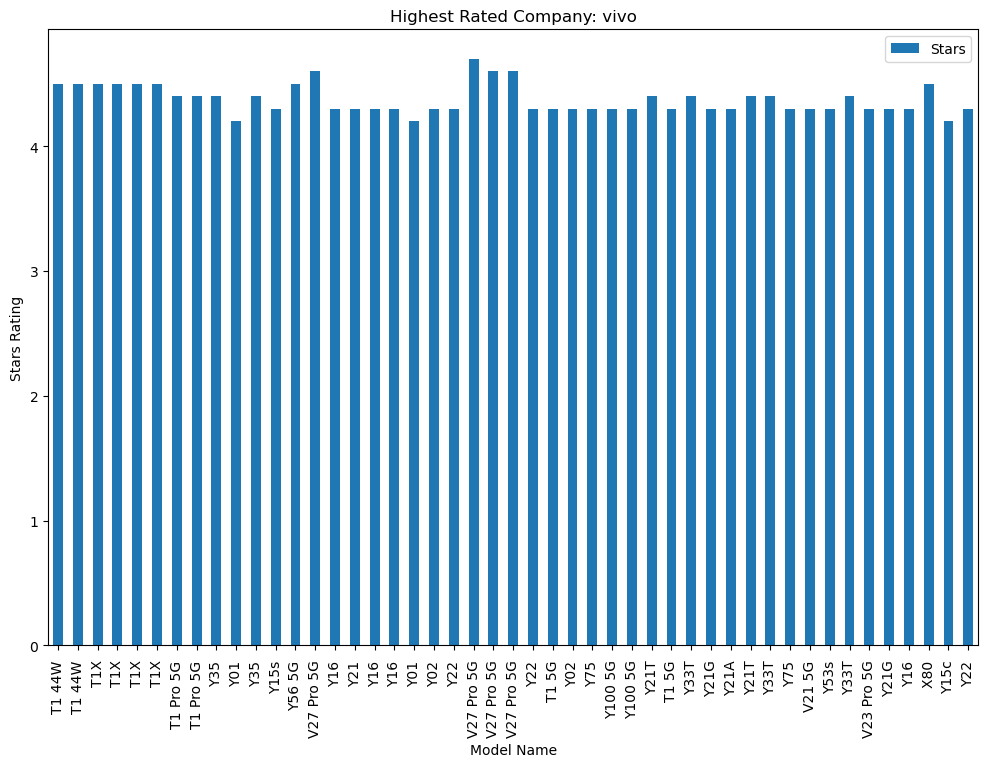

In [22]:
# Since this Data is Scraped from an E-commerce website lets find the highest rated 
# model for a the different companies out of all the models


company_ratings = mobile_df.groupby("Company")["Stars"].max()

company_ratings = company_ratings.sort_values(ascending=False)

top_company = company_ratings.index[0]

filtered_df = mobile_df[mobile_df["Company"] == top_company]

fig, ax = plt.subplots(figsize=(12, 8))
filtered_df.plot.bar(x="model_name", y="Stars", ax=ax, rot=90)
ax.set_xlabel("Model Name")
ax.set_ylabel("Stars Rating")
ax.set_title(f"Highest Rated Company: {top_company}")
plt.show()


From this Graph we come to know that the Highest rating of all the companies is given to `Vivo`, with the highest rated model being all the colour variants of `Vivo V27 Pro 5G`

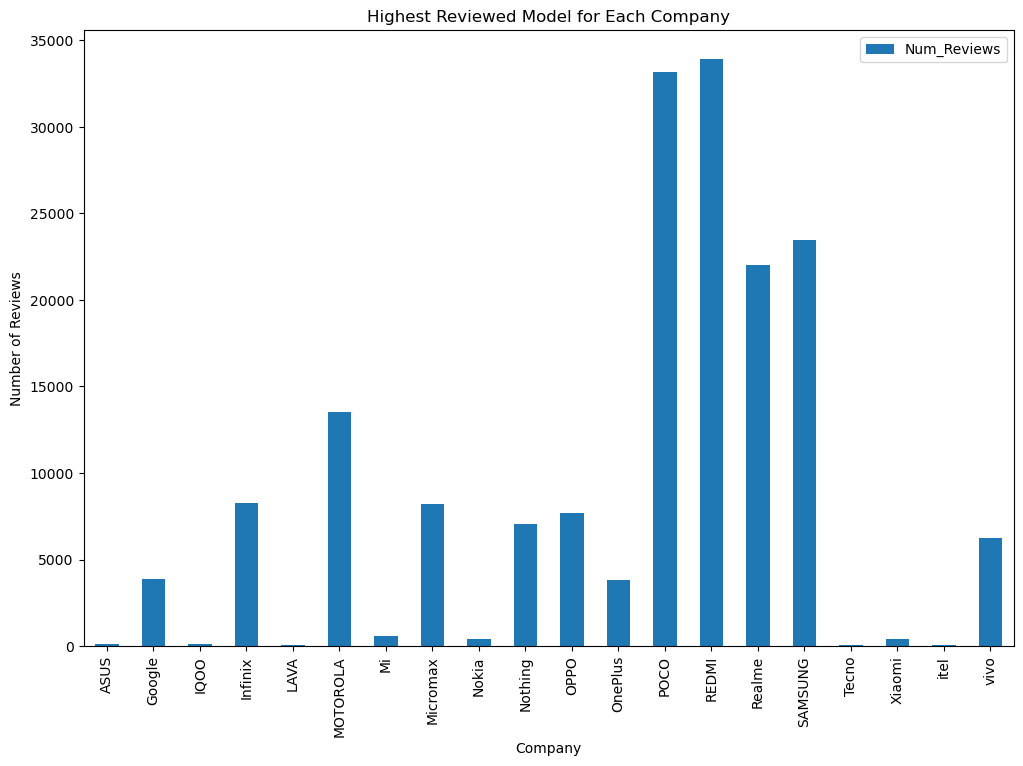

In [23]:
# Seeing the highest review for each Company


grouped_df = mobile_df.groupby("Company")
highest_reviewed_models = grouped_df.apply(lambda x: x.sort_values("Num_Reviews", ascending=False).iloc[0])
highest_reviewed_df = pd.DataFrame(highest_reviewed_models)

fig, ax = plt.subplots(figsize=(12, 8))
highest_reviewed_df.plot.bar(x="Company", y="Num_Reviews", ax=ax)
ax.set_xlabel("Company")
ax.set_ylabel("Number of Reviews")
ax.set_title("Highest Reviewed Model for Each Company")
plt.show()

The most Reviewed Models are of the companies like `POCO, REDMI, REALME, SAMSUNG` which indicate they are the most popular and sought after brands  in the market.

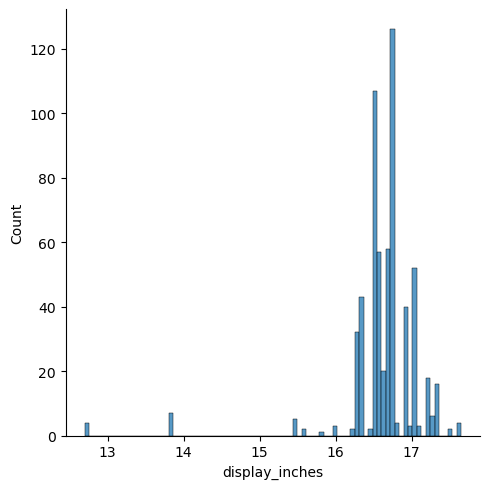

In [24]:
# Lets take a look at the Display size across different models

sns.displot(mobile_df.display_inches);

From this we can say that mobiles which have a screen size of `16cm and 17 cm` are more frequent as compared to the others.

**Co relation matrix**

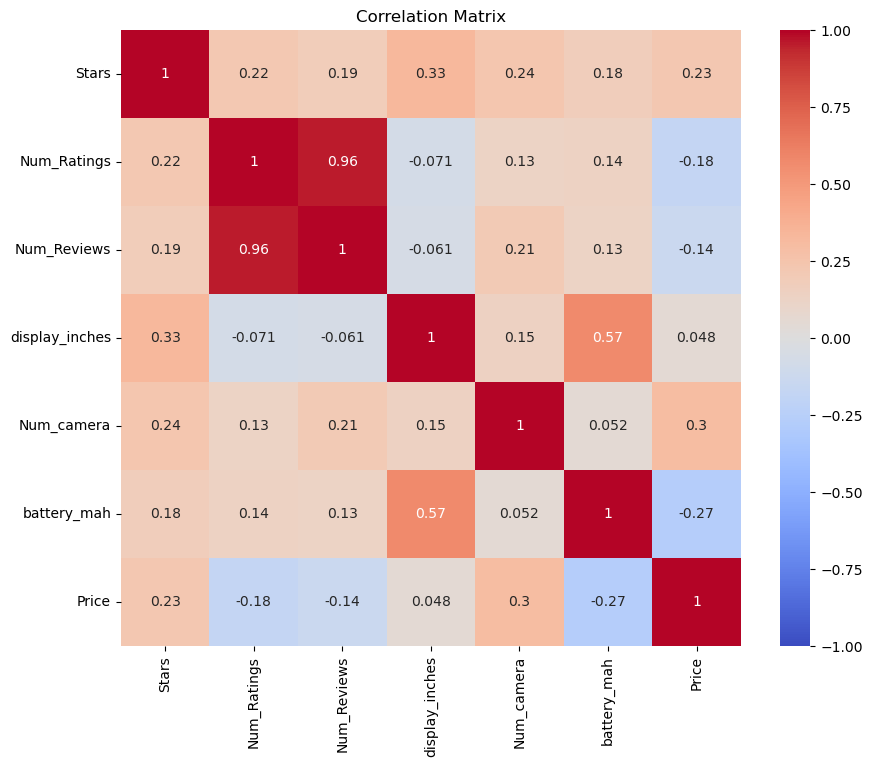

In [25]:
corr_df = mobile_df[['Stars', 'Num_Ratings', 'Num_Reviews', 'Ram', 'Storage', 'display_inches', 'Num_camera', 'battery_mah', 'Price']]
corr_matrix = corr_df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

**Inferences derived from the Heatmap**

<ul>
<li>There is a strong positive correlation between the number of ratings and the number of reviews, which makes sense since more popular phones are likely to have more reviews.</li>
<li>There is a moderate positive correlation between the price of the phone and RAM, which suggests that higher-end phones tend to have more RAM.</li>
<li>There is a weak positive correlation between the display size and battery capacity, which suggests that larger screens may require more battery power.</li>
<li>There is no strong correlation between any other pairs of variables, suggesting that they are largely independent of each other.</li>
</ul>

**Pairplot of the Dataset**

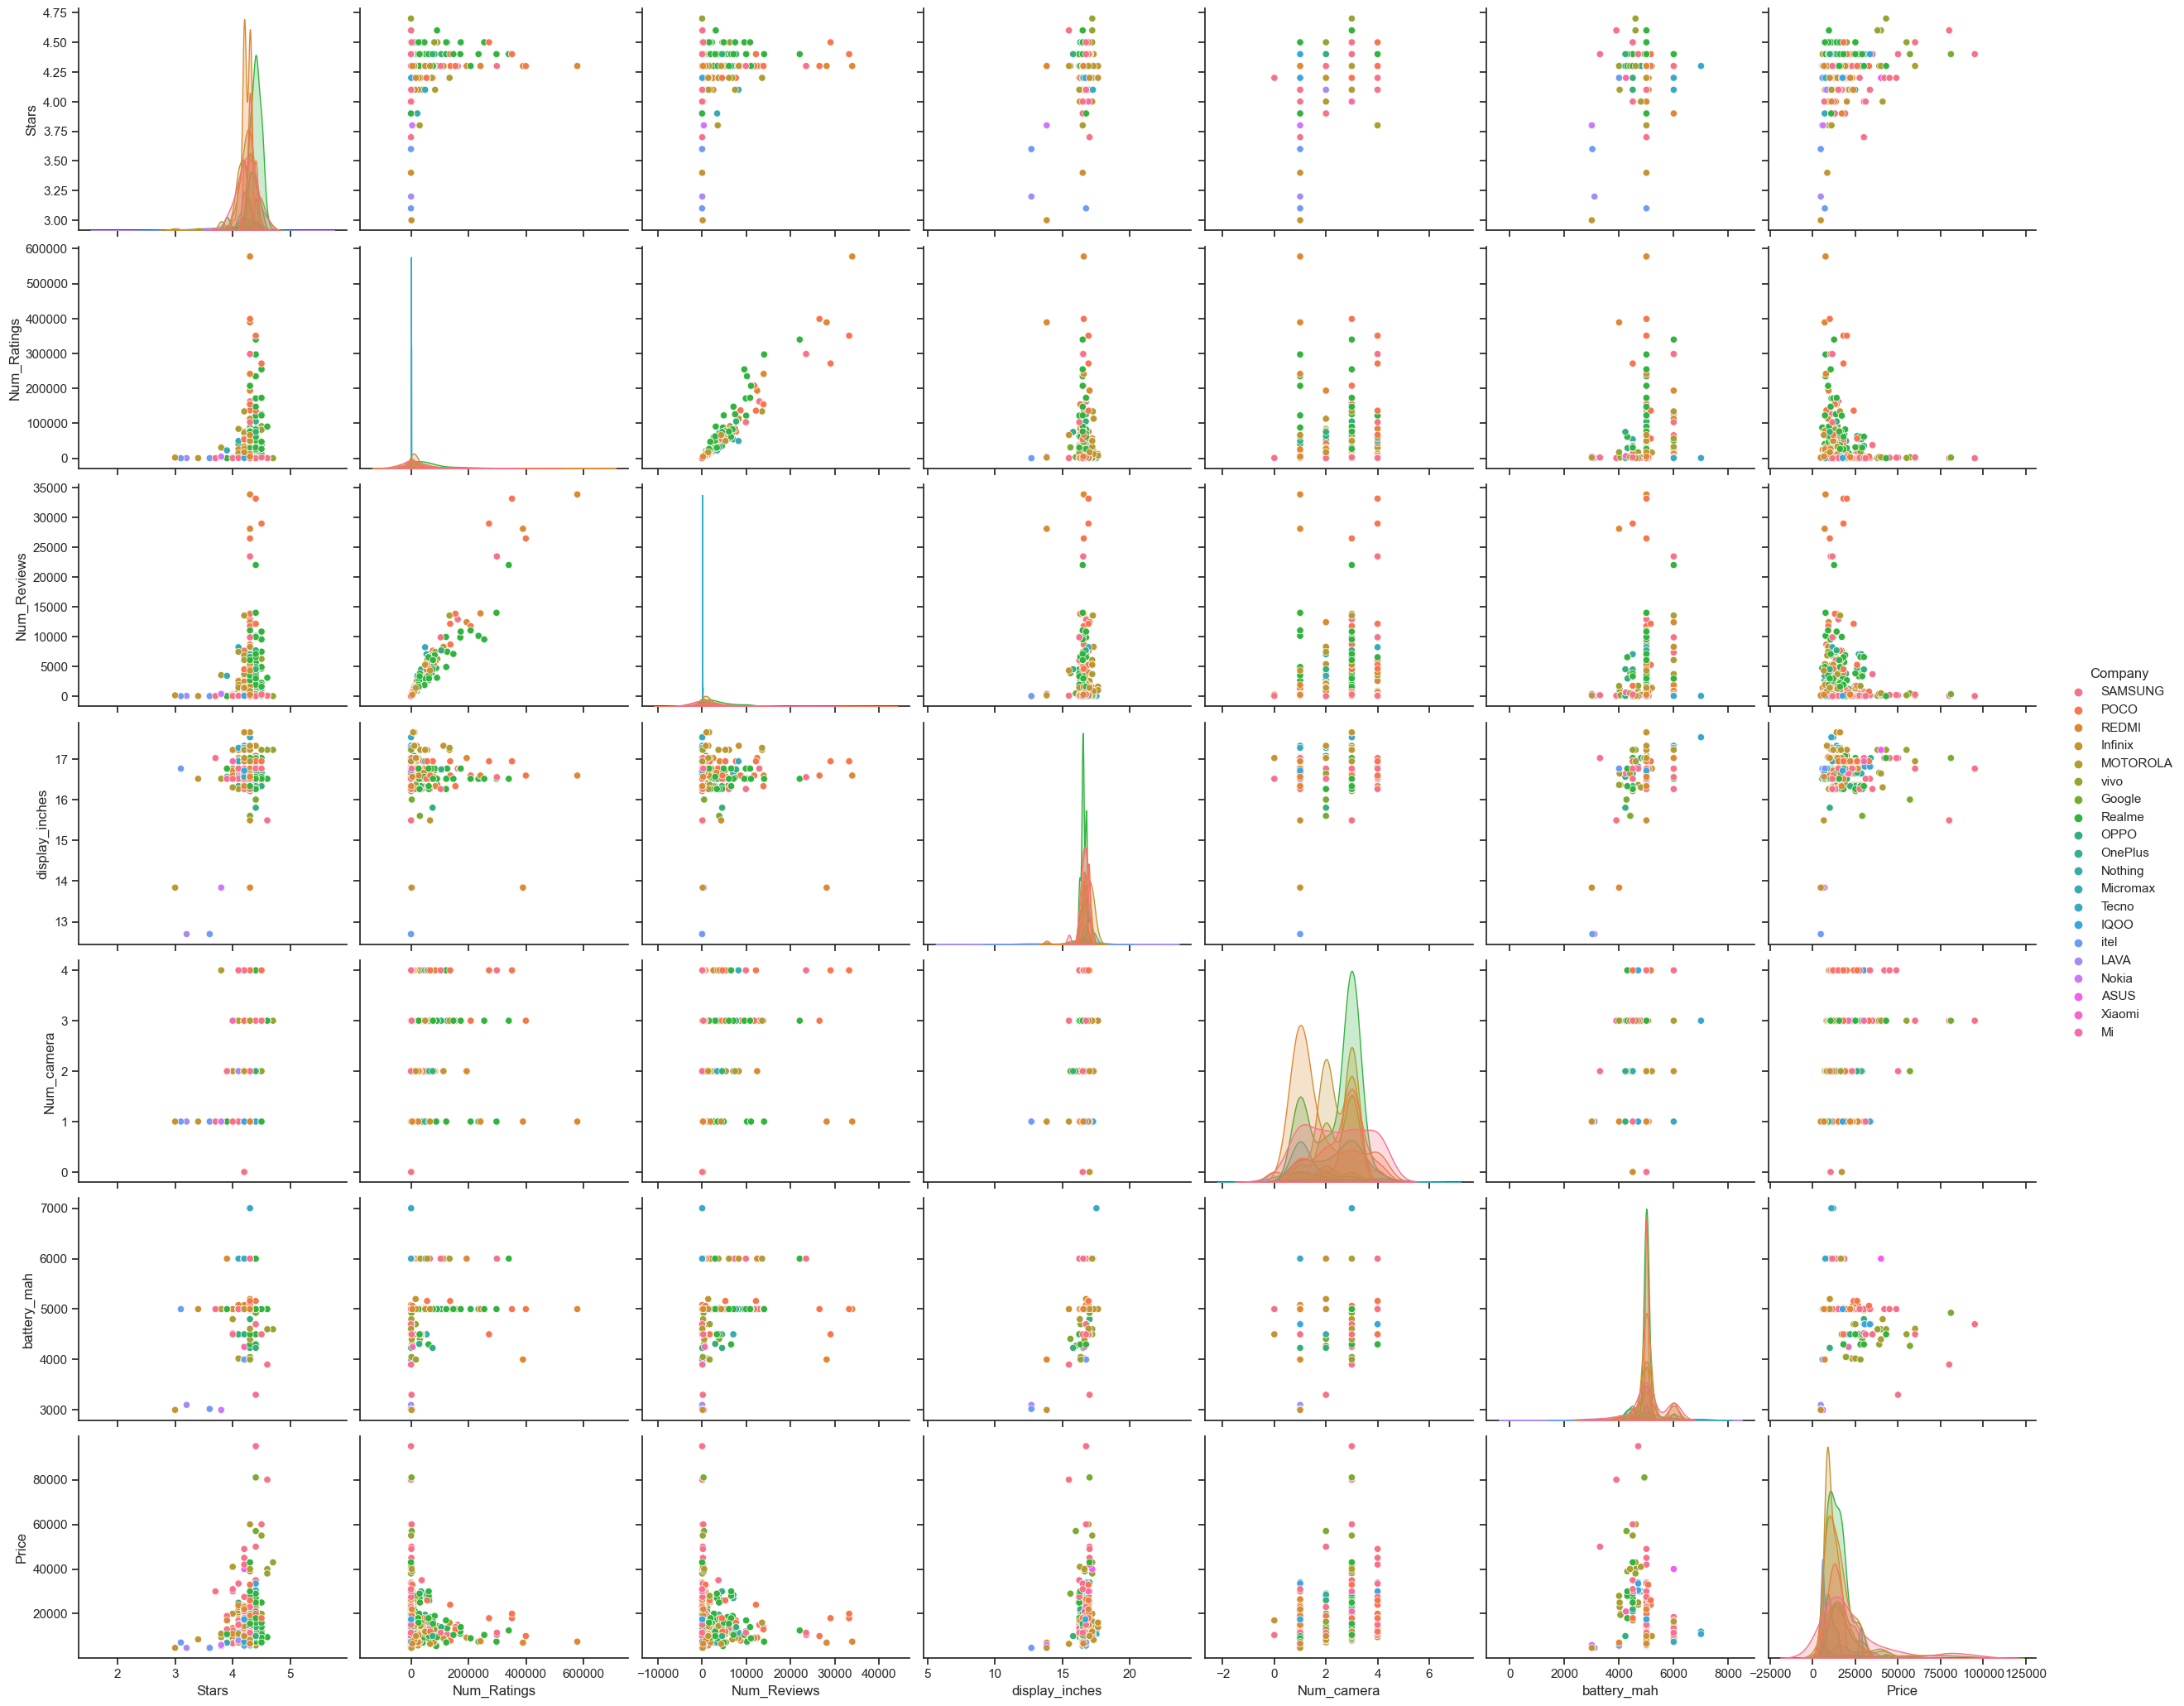

In [28]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(mobile_df, hue="Company", diag_kind="kde", height=3, aspect=1.2)

**Inferences derived from the pairplot**

<ul>
<li>There appears to be a strong positive correlation between the number of ratings and the number of reviews, as indicated by the dense cluster of points in the top-right corner of the scatterplot matrix.</li>
<li>Phones with higher storage and RAM tend to be more expensive, as indicated by the upward trend in the scatterplot between price, storage, and RAM.</li>
<li>Most phones have a display size between 6 and 7 inches, as shown by the peak in the kernel density estimate in the diagonal plot for display size.</li>
<li>There are some differences between the companies in terms of the distribution of their phone features, particularly in terms of battery capacity, display size, and price.</li>
</ul>

There are many other plots that can be made in order to get a better understanding of the data.  
But as of now I have derived enough insights from the data to build a model which would help us,   
to predict the price of a new mobile on the basis of the historical data on the specifications and public reviews.  